# Aerofit Case Study

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Data Audit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

**The dataset has the following features:**

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week


**Product Portfolio:**

*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.



In [2]:
data = pd.read_csv('aerofit_treadmill.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
data.info()         #Data Type of all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

**The dataset has the following features:**

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week


**Product Portfolio:**

*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.





In [4]:
data.describe()         #Statistical Summary

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
data.shape              # Shape of Data 180 Rows(records/data points) and 9 Columns(features/attributes)

(180, 9)

In [6]:
data.isnull().sum()     #Checking for Null Values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
data.dtypes             #Checking for Data Types : 3 attributes are obect type and rest 6 are int64

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Univariate Analysis

  **Summary**:



*   The Highest selling Product is KP281 followed by KP481 and KP781

*   The Mean age of the user is 28 and most of the data of the users lies in the range of 24 - 33 (25% - 75%).

*   We have more Male users compared to Female users

*   Most of the users have Medium Level fitness. Mean is 3 and also 25% to 75% of the users have Fitness levels of 3-4.

*   The Most of the users are Fairly educated with Mean ~ 16(15.57) (Graduate Level education)

*   We have Higher number of Partnered Users compared to Single User


*   We can observe that mostly the users use the treadmills 3-4 days a week. We can also see a Negative Trend as the Usange Increases the Count decreases.


*   We can observe that Hardly people Cross the 100 miles threshold with Mean miles as 103 and 50 % of the user walking/running less than 94 miles.





### Product

In [8]:
data.Product.value_counts()         #Count of each Product

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

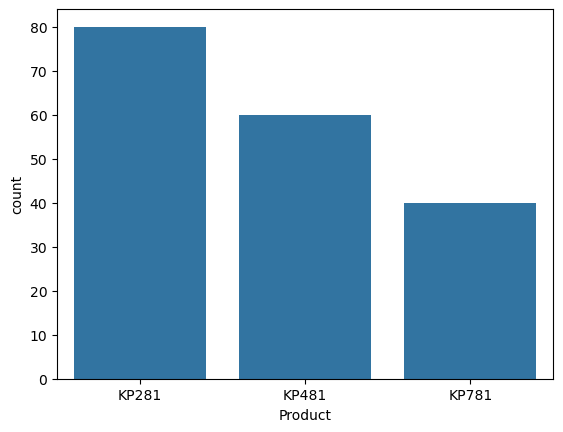

In [9]:
sns.countplot(x=data.Product)
plt.show()

We can Clearly see that the Product KP281(Entry Level treadmill) is the highest seller and Product KP781(Advanced Level treadmill) is the least sold.

### Age

In [10]:
data.Age.describe()         #Statistical Summary of Age

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

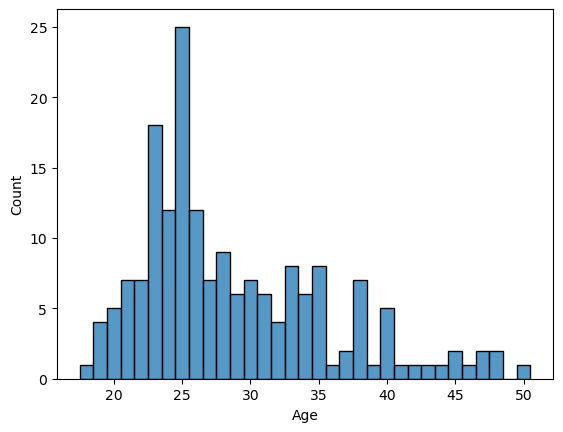

In [11]:
sns.histplot(data=data , x = data.Age , bins = 10 , discrete = True)          # Univariate Analysis (Distribution of data by Age)
plt.show()

We can see that the data is distributed from Age range 18(Min) to 50(Max) with the Mean Age 28.

*   Around 25% of the people fall under the age of 24 - Q1 (25th Percentile)

*   Around 50% of the people fall under the age of 26 - Q2 (50th Percentile)

*   Around 75% of the people fall under the age of 33 - Q3 (75th Percentile)

It is a right skewed distribution





### Gender

In [12]:
data.Gender.value_counts()         #Count of each Gender

Gender
Male      104
Female     76
Name: count, dtype: int64

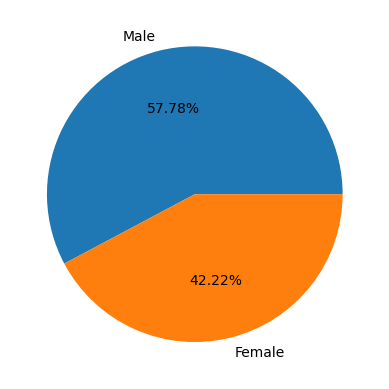

In [13]:
plt.pie(data.Gender.value_counts() , labels = data.Gender.value_counts().index , autopct = '%.2f%%')
plt.show()

The Above data clearly indicates, there are more Male users compared to Female users

### Fitness

In [14]:
data.Fitness.describe()         #Statistical Summary of Fitness

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [15]:
data.Fitness.value_counts()         #Count of each Fitness

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

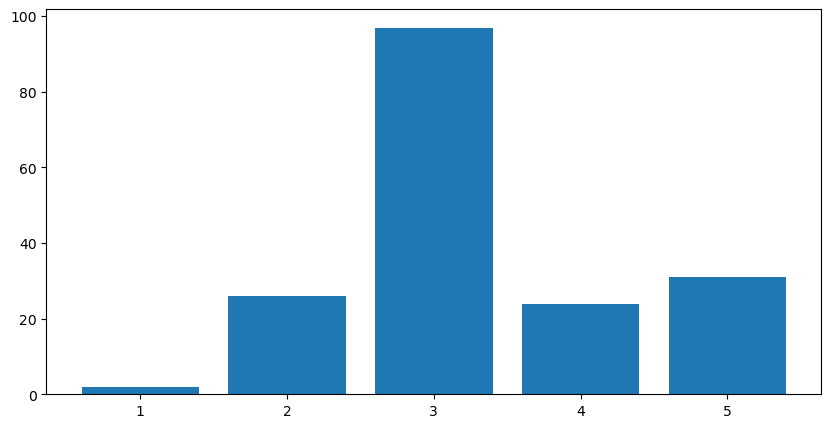

In [16]:
plt.figure(figsize=(10,5))
plt.bar(data.Fitness.value_counts().index , data.Fitness.value_counts())
plt.show()

The Above chart show that most of the users are medium level fit(3) which can also be validated by our Fitness statistical summary where 50% of people having fitness and the mean fitness are ~ 3

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

### Income

In [17]:
data.Income.describe()         #Statistical Summary of Income

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

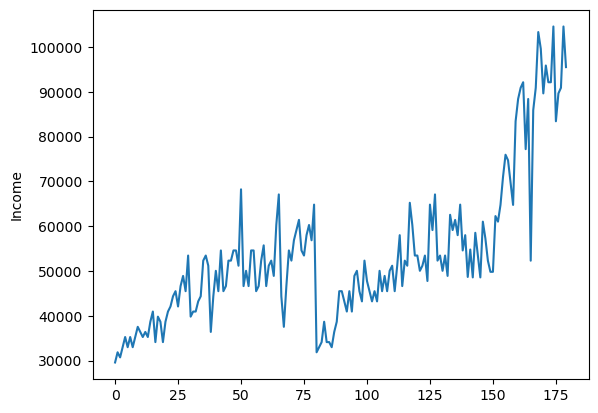

In [18]:
sns.lineplot(data = data.Income)           #No Trend can be realised here
plt.show()

### Education

In [19]:
data.Education.describe()         #Statistical Summary of Education

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [20]:
data.Education.value_counts()         #Count of each Education

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

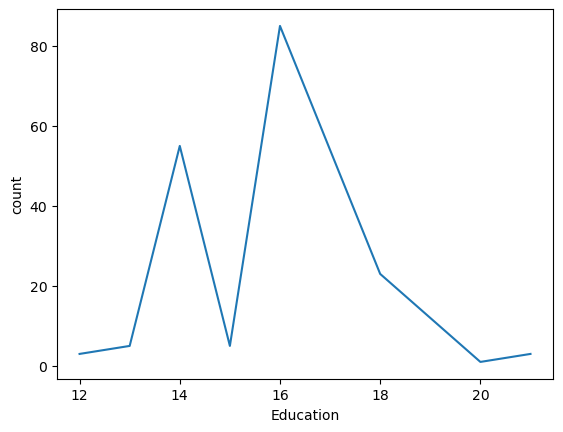

In [21]:
sns.lineplot(x= data.Education.value_counts().index,y=data.Education.value_counts())           #No Trend can be realised here
plt.show()

We can se that most of the users are fairly educated with Mean 15 and 50% data is 16 educated. To understand this lets consider some bins like

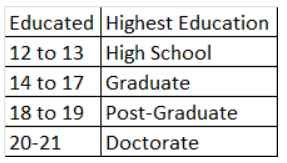

To see the real effect!

In [22]:
pd.cut(data.Education, bins = [12,14,18,20,22], labels =['High School','Graduate','Post-Graduate','Doctorate'] ).value_counts()

Education
Graduate         113
High School       60
Doctorate          3
Post-Graduate      1
Name: count, dtype: int64

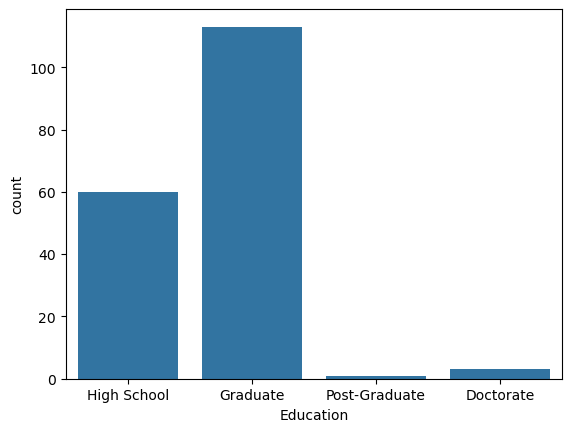

In [23]:
sns.countplot(x=pd.cut(data.Education, bins = [12,14,18,20,22], labels =['High School','Graduate','Post-Graduate','Doctorate'] ))
plt.show()

### Marital Status

In [24]:
data.MaritalStatus.value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

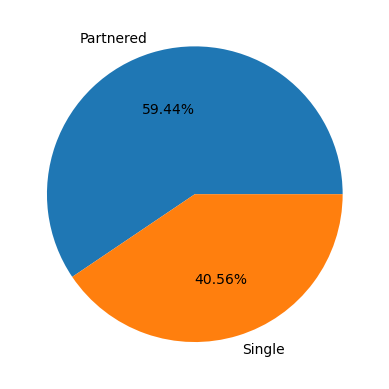

In [25]:
plt.pie(data.MaritalStatus.value_counts(),labels = data.MaritalStatus.value_counts().index , autopct = '%.2f%%')
plt.show()

We can observe that most of the users are Partnered

### Usage

In [26]:
data.Usage.value_counts()     #Usage: The average number of times the customer plans to use the treadmill each week.

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

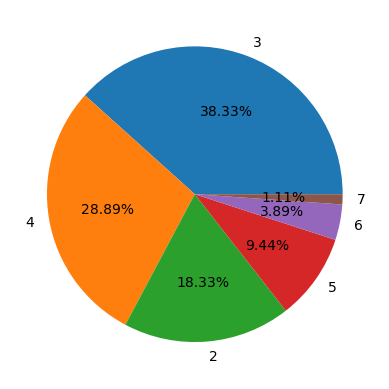

In [27]:
plt.pie(data.Usage.value_counts() ,labels = data.Usage.value_counts().index, autopct = '%.2f%%')
plt.show()

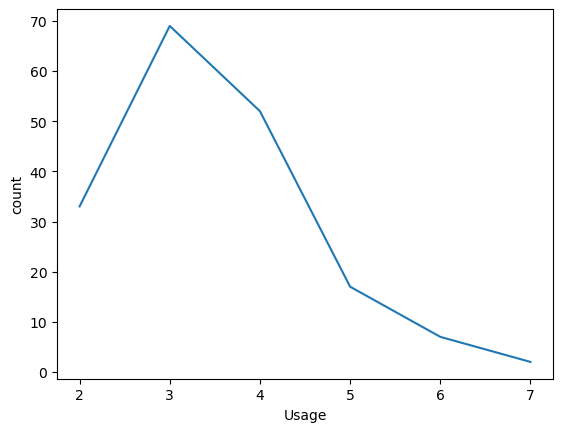

In [28]:
sns.lineplot(x=data.Usage.value_counts().index , y = data.Usage.value_counts())
plt.show()

We can oserve that mostly the users use the treadmills 3-4 days a week. We can also see a Negative Trend as the Usange Increases the Count decreases.

### Miles

In [29]:
data.Miles.describe()             # Statistical Summary of Miles walk/run

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

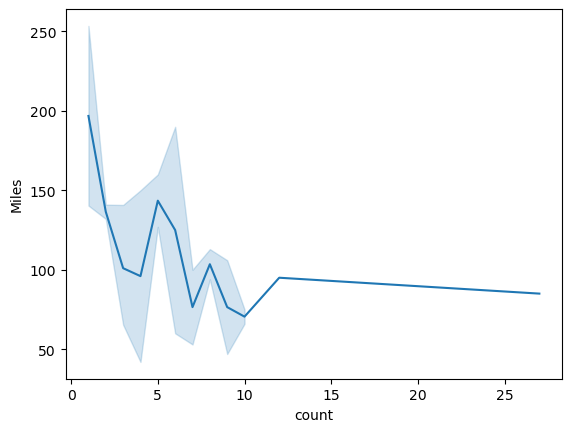

In [30]:
sns.lineplot(x=data.Miles.value_counts(),y=data.Miles.value_counts().index)
plt.show()

We can observe that Hardly people Cross the 100 miles threshold with Mean miles as 103 and 50 % of the user walk less than 94 miles.

## Bivariate Analysis

### Age Vs Product

In [31]:
age_product = data[['Age','Product']]
age_product.head()

,Age,Product
0,18,KP281
1,19,KP281
2,19,KP281
3,19,KP281
4,20,KP281


In [32]:
age_product.groupby('Product').describe()

Age                                                 
        count   mean       std   min    25%   50%    75%   max
Product                                                       
KP281    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0
KP481    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0
KP781    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0

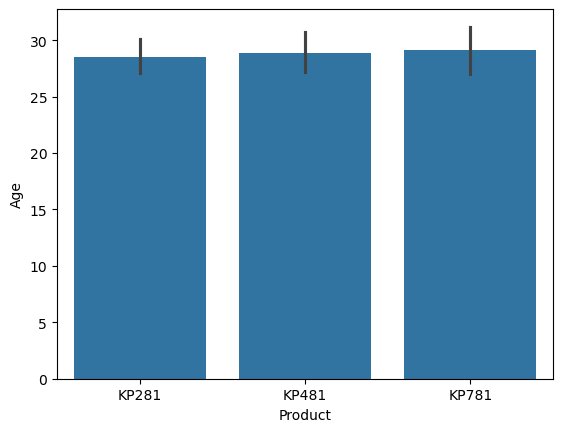

In [33]:
sns.barplot(x=age_product.Product,y=age_product.Age)
plt.show()

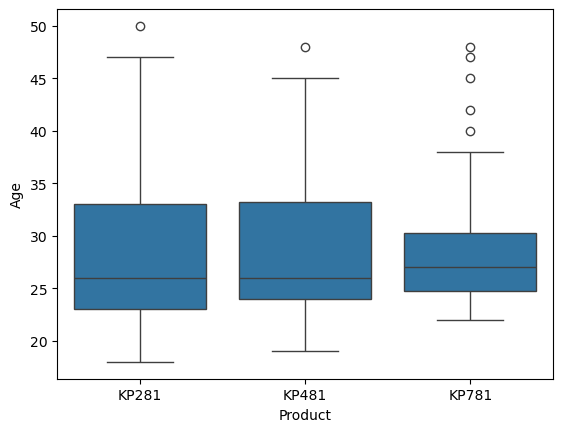

In [34]:
sns.boxplot(y=age_product.Age,x=age_product.Product)
plt.show()

In [35]:
round(pd.crosstab(index=pd.cut(age_product.Age,bins=3,labels=['20-30','30-40','40-50']) , columns=age_product.Product , margins=True ,normalize=True)*100,4)

Product,KP281,KP481,KP781,All
Age,,,,
20-30,27.7778,17.7778,13.8889,59.4444
30-40,12.7778,12.7778,5.5556,31.1111
40-50,3.8889,2.7778,2.7778,9.4444
All,44.4444,33.3333,22.2222,100.0000


We can observe that the Mean age for the Product KP281 and KP481 is 28 and for KP781 it is 29. We can also observe lots of Outliers in the data for Product KP781 compared to other Products.

We can also see that 27.7% of the users who are in the age range of 20-30 buy KP281.Also the chances of users in the Age 30-40 buying KP281 and in the Age 30-40 buying KP481 are same 12.7% and similarly we can say the same for age 40-50 the chances of user buying KP481 and KP781 is same 2.7%.

### Income Vs Product

In [36]:
data.Income.describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

Here we can undestand the Income range of the data, like:

IQR[Inter Quartile Range] = P75-P25 = 58668.000000 - 44058.750000

                          = 14609.25

In [37]:
iqr_income = data.Income.quantile(0.75) - data.Income.quantile(0.25)
iqr_income

14609.25

In [38]:
upper_limit_income = data.Income.quantile(0.75) + (1.5 * iqr_income)
upper_limit_income

80581.875

In [39]:
lower_limit_income = data.Income.quantile(0.25) - (1.5 * iqr_income)
lower_limit_income

22144.875

In [40]:
data[data.Income > upper_limit_income]      # The following data frame can considered as outliers as the Income > upper_limit_income (80581.875)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [41]:
data[data.Income > upper_limit_income].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,34.157895,17.473684,5.000000,4.736842,92701.894737,187.368421
std,7.088827,1.711673,0.942809,0.561951,6438.269194,68.543750
min,27.000000,14.000000,4.000000,3.000000,83416.000000,100.000000
25%,28.500000,16.000000,4.000000,5.000000,89018.500000,150.000000
50%,31.000000,18.000000,5.000000,5.000000,90886.000000,160.000000
75%,39.000000,18.000000,6.000000,5.000000,95687.000000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [42]:
data[data.Income > upper_limit_income].Product.value_counts()

Product
KP781    19
Name: count, dtype: int64

In [43]:
data[data.Income < lower_limit_income]  # No outliers on the lower range

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


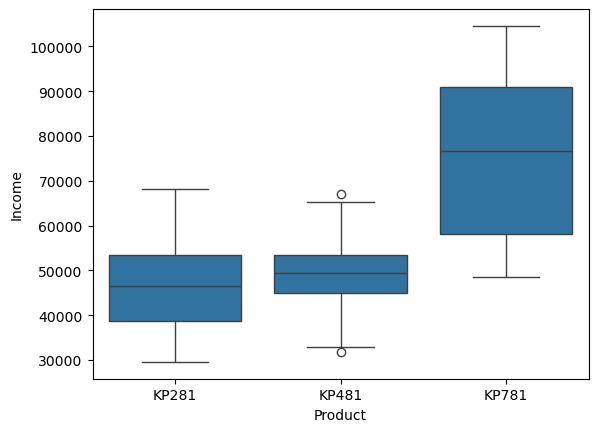

In [44]:
sns.boxplot(data=data , x = data.Product , y = data.Income )
plt.show()

In [45]:
income_product = data[['Income','Product']]
income_product.head()

,Income,Product
0,29562,KP281
1,31836,KP281
2,30699,KP281
3,32973,KP281
4,35247,KP281


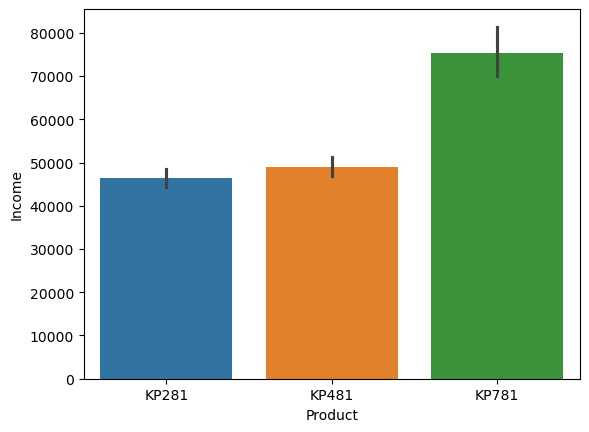

In [46]:
sns.barplot(x=income_product.Product , y=income_product.Income , hue=income_product.Product)
plt.show()

We can clearly observe from the above plot that the median Income of individuals with product KP281 and KP481 is close to 50000 USD compared to KP781 with median Income close to 80000 USD

In [47]:
pd.cut(income_product.Income , bins=[30000,50000,80000,110000] , labels=['Low','Medium','High']).value_counts()

Income
Low       82
Medium    78
High      19
Name: count, dtype: int64

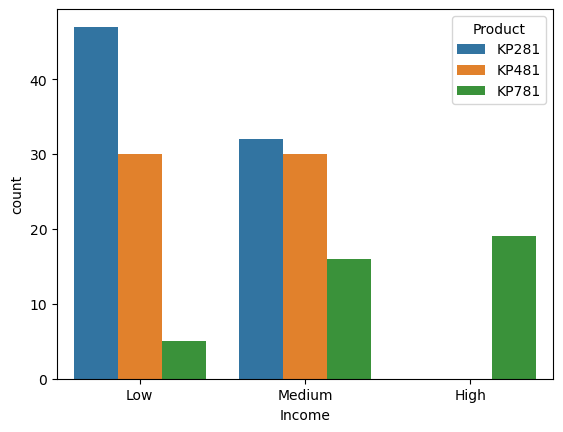

In [48]:
sns.countplot(x=pd.cut(income_product.Income , bins=[30000,50000,80000,110000] , labels=['Low','Medium','High']) , hue=income_product.Product)
plt.show()

In [49]:
round(pd.crosstab(index=pd.cut(income_product.Income , bins=[30000,50000,80000,110000] , labels=['Low','Medium','High']) , columns=income_product.Product , margins=True ,normalize=True)*100,4)

Product,KP281,KP481,KP781,All
Income,,,,
Low,26.2570,16.7598,2.7933,45.8101
Medium,17.8771,16.7598,8.9385,43.5754
High,0.0000,0.0000,10.6145,10.6145
All,44.1341,33.5196,22.3464,100.0000


We can Observe that the users in the Income bracket of [30K-50K] (Low) Usually prefer the KP281 Product. Medium Income users [50K-80K] (Medium) prefer KP281 and KP481 almost equally

We can see that 26% of the people in the low income bracket buy KP281 and for Product KP481 the chances for user buying from low income bracket and medium income bracket is same 16.75%.

Users with income in range [80K-110K] (High) only have bought KP781.

It is intresting to note that all high income users buy KP781 as Marginal Probability[P(High_income_user)=10.6%] is exactly same as Conditional Probability[P(High_income_user|Product=K781)=10.6%]

### Education Vs Product

In [50]:
education_product = data[['Education','Product']]
education_product.head()

,Education,Product
0,14,KP281
1,15,KP281
2,14,KP281
3,12,KP281
4,13,KP281


In [51]:
education_product['Highest Education'] = pd.cut(education_product.Education , bins=[12,14,18,20,22] , labels=['High School','Graduate','Post-Graduate','Doctorate'] , right=False)
education_product.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_7844\2440810302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_product['Highest Education'] = pd.cut(education_product.Education , bins=[12,14,18,20,22] , labels=['High School','Graduate','Post-Graduate','Doctorate'] , right=False)


,Education,Product,Highest Education
0,14,KP281,Graduate
1,15,KP281,Graduate
2,14,KP281,Graduate
3,12,KP281,High School
4,13,KP281,High School


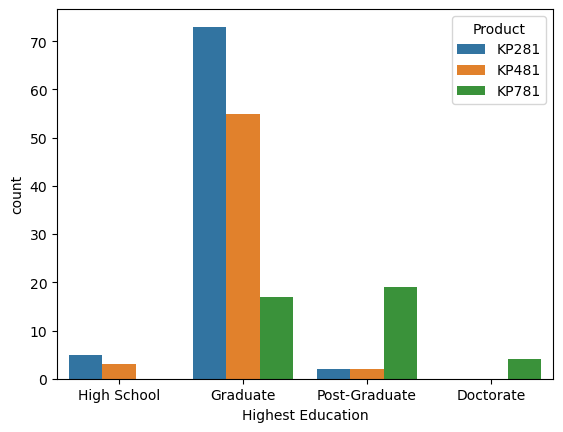

In [52]:
sns.countplot(x=education_product['Highest Education'] , hue=education_product.Product)
plt.show()

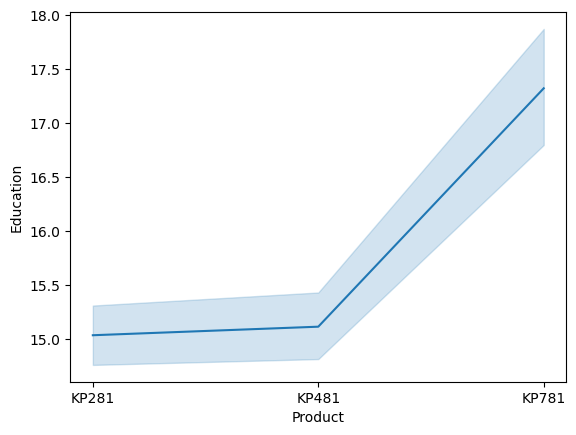

In [53]:
sns.lineplot(x=education_product.Product , y=education_product.Education)
plt.show()

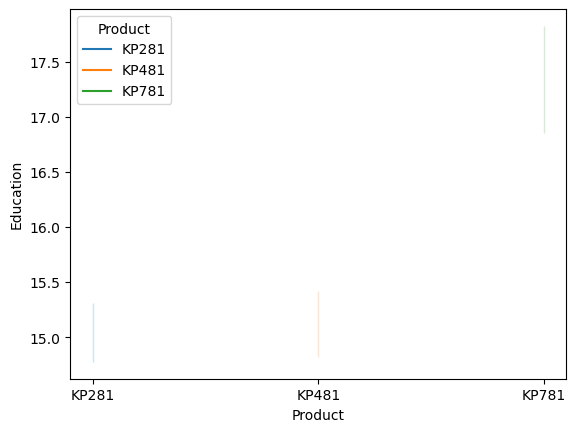

In [54]:
sns.lineplot(x=education_product.Product , y=education_product.Education , hue=education_product.Product)
plt.show()

In [55]:
round(pd.crosstab(index=education_product['Highest Education'] , columns=education_product.Product , margins=True ,normalize=True)*100,2)

Product,KP281,KP481,KP781,All
Highest Education,,,,
High School,2.78,1.67,0.00,4.44
Graduate,40.56,30.56,9.44,80.56
Post-Graduate,1.11,1.11,10.56,12.78
Doctorate,0.00,0.00,2.22,2.22
All,44.44,33.33,22.22,100.00


We can observe that people with High Education level users prefer KP781 model. We can also see that there is not much difference etween the eduction levels of KP281 and KP481 Product users.

We can also see that 9.4% users and 10.56% users using KP781 are Graduate level and Post Graduate level educated.

We can also see that 40.56% Graduate users use KP281 and 30.56.% use KP481.

### Miles Vs Product

In [56]:
miles_product = data[['Miles','Product']]
miles_product.head()

,Miles,Product
0,112,KP281
1,75,KP281
2,66,KP281
3,85,KP281
4,47,KP281


In [57]:
miles_product.Miles.describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [58]:
miles_product['Miles_level'] = pd.cut(miles_product.Miles,bins=[20,40,70,100,360],labels=['Begginer','Intermediate','Advanced','Professional'])
miles_product.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_7844\1164563102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miles_product['Miles_level'] = pd.cut(miles_product.Miles,bins=[20,40,70,100,360],labels=['Begginer','Intermediate','Advanced','Professional'])


,Miles,Product,Miles_level
0,112,KP281,Professional
1,75,KP281,Advanced
2,66,KP281,Intermediate
3,85,KP281,Advanced
4,47,KP281,Intermediate


In [59]:
miles_product.groupby('Product').describe()

Miles                                                         
        count        mean        std   min    25%    50%    75%    max
Product                                                               
KP281    80.0   82.787500  28.874102  38.0   66.0   85.0   94.0  188.0
KP481    60.0   87.933333  33.263135  21.0   64.0   85.0  106.0  212.0
KP781    40.0  166.900000  60.066544  80.0  120.0  160.0  200.0  360.0

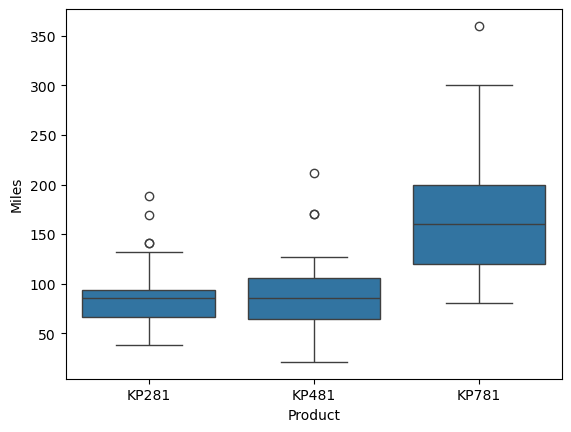

In [60]:
sns.boxplot(x=miles_product.Product,y=miles_product.Miles)
plt.show()

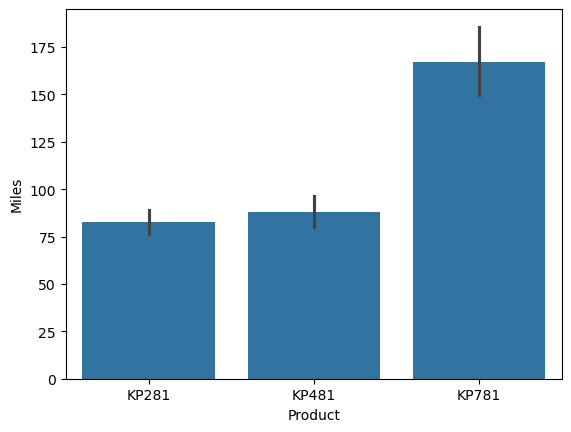

In [61]:
sns.barplot(x=miles_product.Product,y=miles_product.Miles)
plt.show()

In [62]:
round(pd.crosstab(index=miles_product.Miles_level , columns=miles_product.Product , margins=True , normalize=True )*100,2)

Product,KP281,KP481,KP781,All
Miles_level,,,,
Begginer,1.67,0.56,0.00,2.22
Intermediate,13.89,9.44,0.00,23.33
Advanced,18.89,14.44,4.44,37.78
Professional,10.00,8.89,17.78,36.67
All,44.44,33.33,22.22,100.00


C:\Users\hp\AppData\Local\Temp\ipykernel_7844\3321482197.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(miles_product.pivot_table(index='Product',columns='Miles_level',values='Miles',aggfunc='sum'))


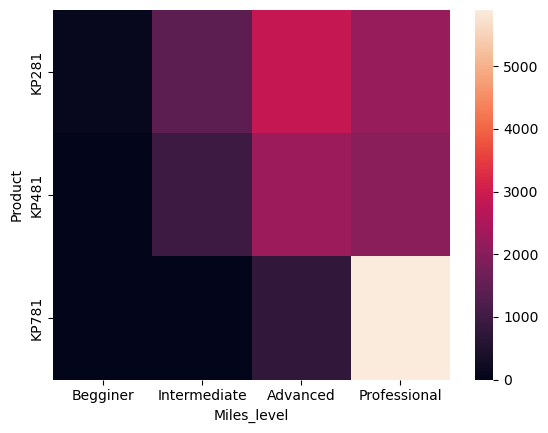

In [63]:
sns.heatmap(miles_product.pivot_table(index='Product',columns='Miles_level',values='Miles',aggfunc='sum'))
plt.show()

We can see a very strong corelation between users with High miles (Professional - Miles_level) and Product KP781. We can also notice a possible corelation of product KP281 and Advanced Miles_leve.

### Usage Vs Product

In [64]:
usage_product = data[['Usage','Product']]
usage_product.head()

,Usage,Product
0,3,KP281
1,2,KP281
2,4,KP281
3,3,KP281
4,4,KP281


In [65]:
usage_product.groupby('Product').describe()

Usage                                              
        count      mean       std  min  25%  50%   75%  max
Product                                                    
KP281    80.0  3.087500  0.782624  2.0  3.0  3.0  4.00  5.0
KP481    60.0  3.066667  0.799717  2.0  3.0  3.0  3.25  5.0
KP781    40.0  4.775000  0.946993  3.0  4.0  5.0  5.00  7.0

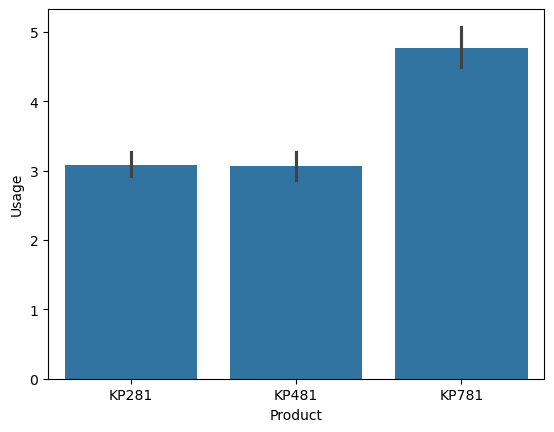

In [66]:
sns.barplot(x=usage_product.Product,y=usage_product.Usage)
plt.show()

In [67]:
usage_product.Product.replace({'KP281':281,'KP481':481,'KP781':781},inplace=True)
usage_product.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_7844\3575859007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usage_product.Product.replace({'KP281':281,'KP481':481,'KP781':781},inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7844\3575859007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

,Usage,Product
0,3,281
1,2,281
2,4,281
3,3,281
4,4,281


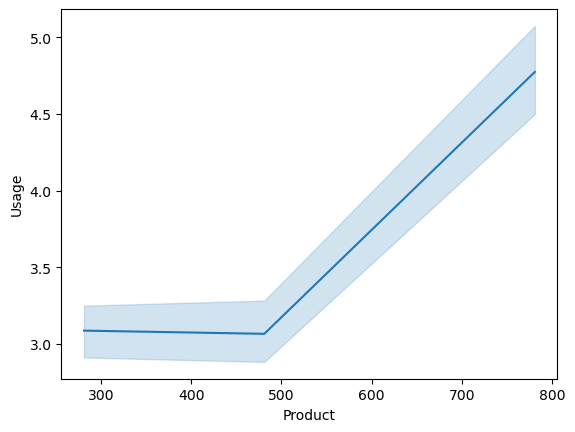

In [68]:
sns.lineplot(x=usage_product.Product,y=usage_product.Usage)
plt.show()

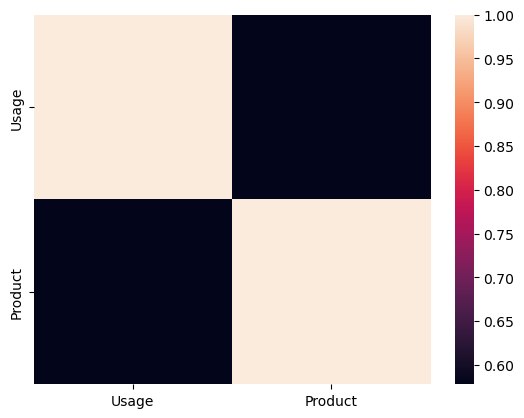

In [69]:
sns.heatmap(usage_product.corr())
plt.show()

We can see there is no corelation between product and usage, We can also see similar usage trend for KP281 and KP481 with mean usage of 3 days andas compared to KP781 ~ 5

### Fitness Vs Product

In [70]:
fitness_product = data[['Fitness','Product']]
fitness_product.head()

,Fitness,Product
0,4,KP281
1,3,KP281
2,3,KP281
3,3,KP281
4,2,KP281


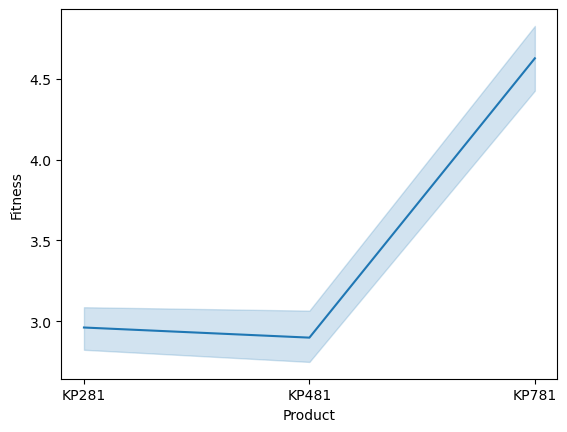

In [71]:
sns.lineplot(x=fitness_product.Product,y=fitness_product.Fitness)
plt.show()

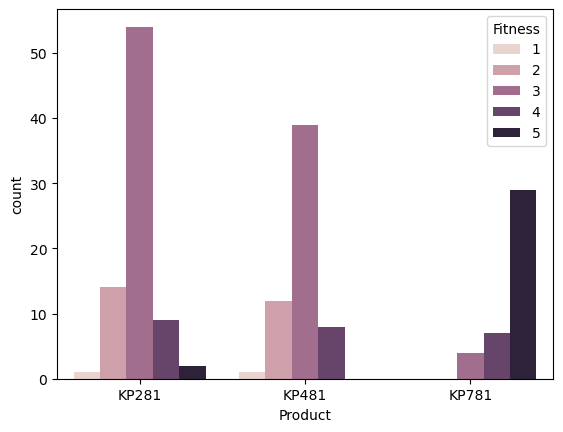

In [72]:
sns.countplot(x=fitness_product.Product,hue=fitness_product.Fitness,stat='count')
plt.show()

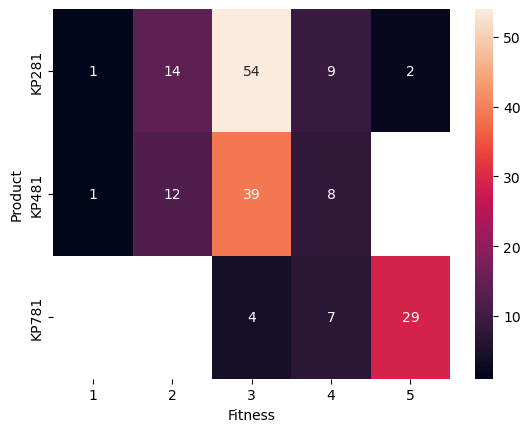

In [73]:
sns.heatmap(pd.pivot_table(data = fitness_product , index=fitness_product.Product , columns=fitness_product.Fitness , values='Fitness' , aggfunc='count'), annot=True)
plt.show()

We can observer that there is a strong correlation between the count of KP781 with count of Fitness(5) , KP281 with count of Fitness(3) and KP481 and Fitness(3)

### Marital Status Vs Product

In [74]:
marital_product = data[['MaritalStatus','Product']]
marital_product.head()

,MaritalStatus,Product
0,Single,KP281
1,Single,KP281
2,Partnered,KP281
3,Single,KP281
4,Partnered,KP281


In [75]:
pd.pivot_table(data = marital_product , index=marital_product.Product , columns=marital_product.MaritalStatus , values='MaritalStatus' , aggfunc='count')

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


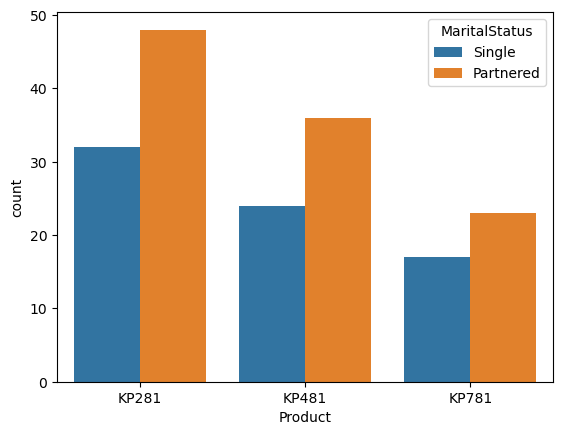

In [76]:
sns.countplot(x=marital_product.Product,hue=marital_product.MaritalStatus)
plt.show()

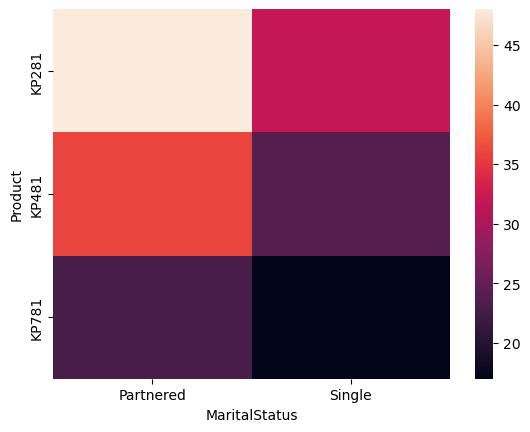

In [77]:
sns.heatmap(pd.pivot_table(data = marital_product , index=marital_product.Product , columns=marital_product.MaritalStatus , values='MaritalStatus' , aggfunc='count'))
plt.show()

In [78]:
round(pd.crosstab(index=marital_product.Product , columns=marital_product.MaritalStatus , margins=True , normalize=True)*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


We can see that for all the Products the count of Partnered users is more compared to the count of Single users.

### Gender Vs Product

In [79]:
gender_product = data[['Gender','Product']]
gender_product.head()

,Gender,Product
0,Male,KP281
1,Male,KP281
2,Female,KP281
3,Male,KP281
4,Male,KP281


In [80]:
pd.pivot_table(data = gender_product , index=gender_product.Product , columns=gender_product.Gender , values='Gender' , aggfunc='count')

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


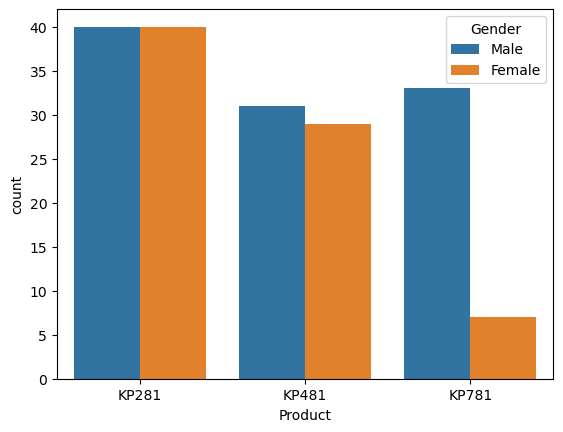

In [81]:
sns.countplot(x=gender_product.Product,hue=gender_product.Gender)
plt.show()

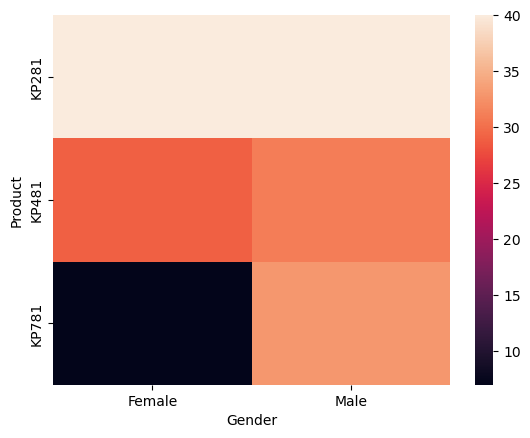

In [82]:
sns.heatmap(pd.pivot_table(data = gender_product , index=gender_product.Product , columns=gender_product.Gender , values='Gender' , aggfunc='count'))
plt.show()

In [83]:
round(pd.crosstab(index=gender_product.Product , columns=gender_product.Gender , margins=True , normalize=True)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


We can observe that there is very similar co-relation between Product and Gender for Product KP281 , it is also intresting to see that there 0 co-relation between KP781 and Females.

## Multi Variate Analysis

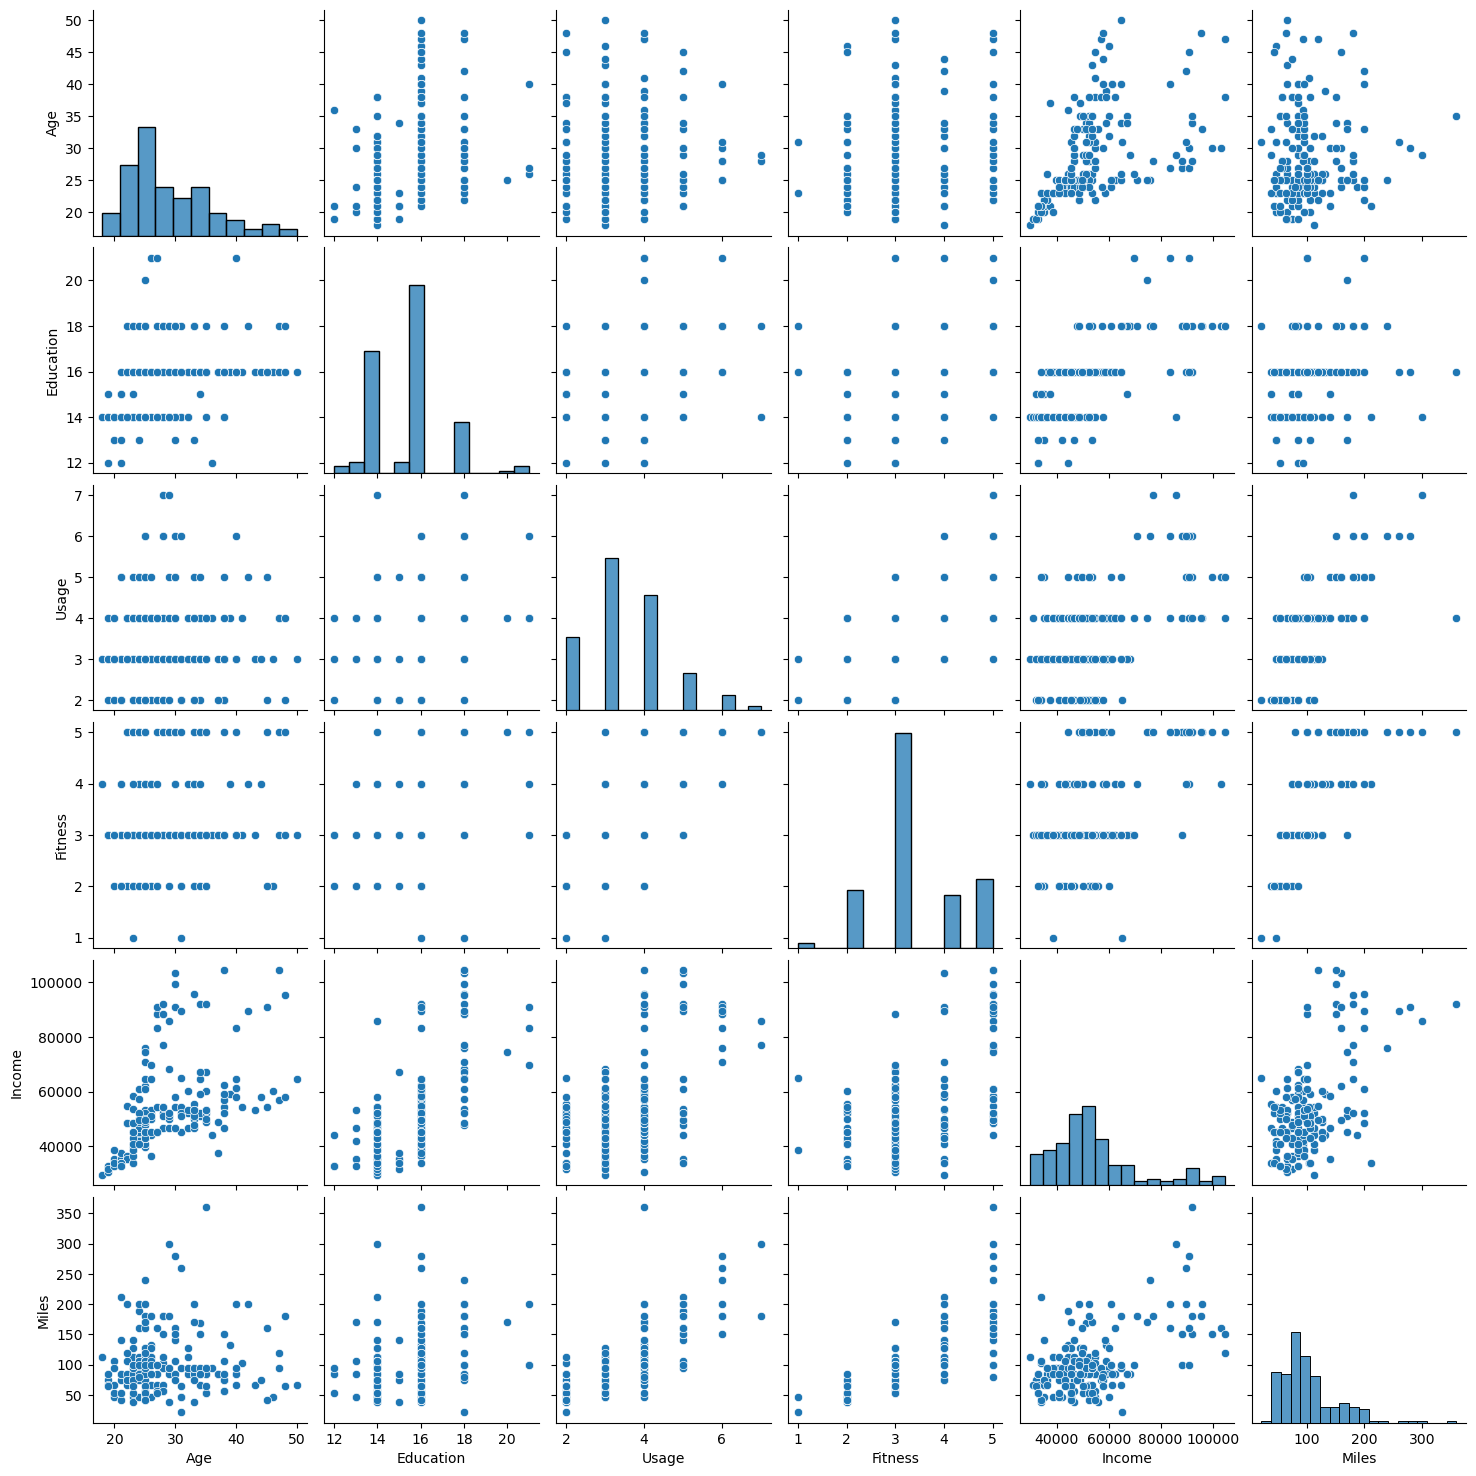

In [84]:
sns.pairplot(data)
plt.show()

In [85]:
round(pd.pivot_table(data = data , index=data.Product , columns=data.Fitness , values='Income' , aggfunc='mean'))

Fitness,1,2,3,4,5
Product,,,,,
KP281,38658.0,46779.0,46659.0,44975.0,47754.0
KP481,65220.0,45480.0,49941.0,47470.0,NaN
KP781,NaN,NaN,67879.0,76480.0,76234.0


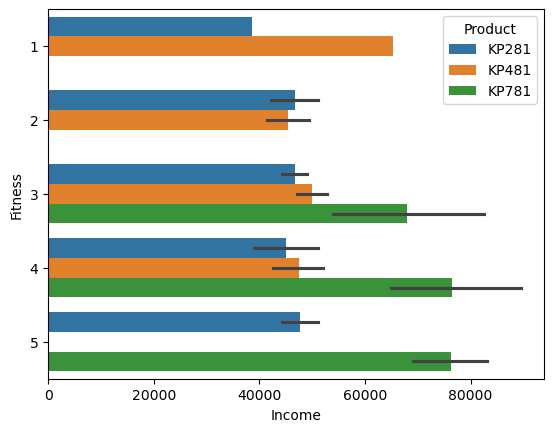

In [86]:
sns.barplot(data=data , x = data.Income , y = data.Fitness , hue = data.Product , orient= 'h' ,estimator='mean')
plt.show()

The above plot describes the distibution of mean Income compared to Fitness Levels of individuals across the various product.

*   For instance users with fitness leve 1 using KP281 have a mean Income of 38658 and users using KP481 have a mean of 65220

*   For instance users with fitness leve 2 using KP281 have a mean Income of 46779 and users using KP481 have a mean of 45480

*   For instance users with fitness leve 3 using KP281 have a mean Income of 46659 and users using KP481 have a mean of 49941 and users using KP781 have mean of 67879

*   For instance users with fitness leve 4 using KP281 have a mean Income of 44975 and users using KP481 have a mean of 47470 and users using KP781 have mean of 76480

*   For instance users with fitness leve 5 using KP281 have a mean Income of 47754 and users using KP781 have mean of 76234


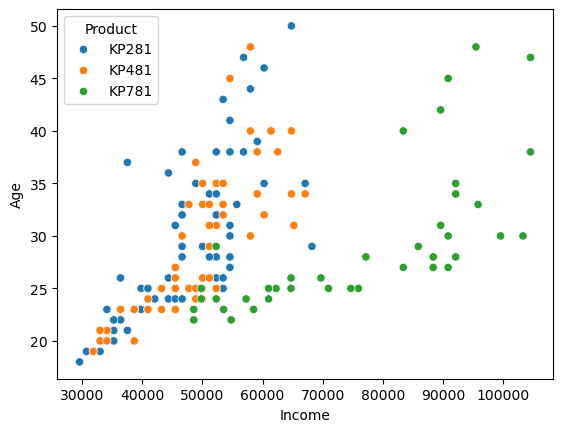

In [87]:
sns.scatterplot(data=data , x = data.Income , y = data.Age , hue = data.Product)
plt.show()

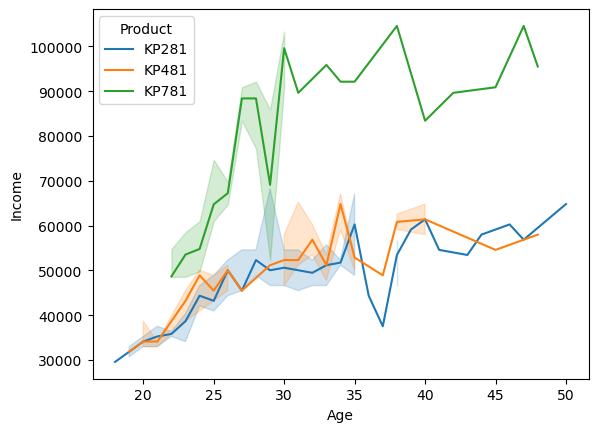

In [88]:
sns.lineplot(data=data , x = data.Age , y = data.Income , hue = data.Product , estimator= 'median')
plt.show()

The Above plot describes the income accross all age over all the products. Please note the maximum number of data points can be located within the age group of 40 and Income 65000

We can also Identify from the above that the median Income of users with KP781 is comparatively more that the users for other products.

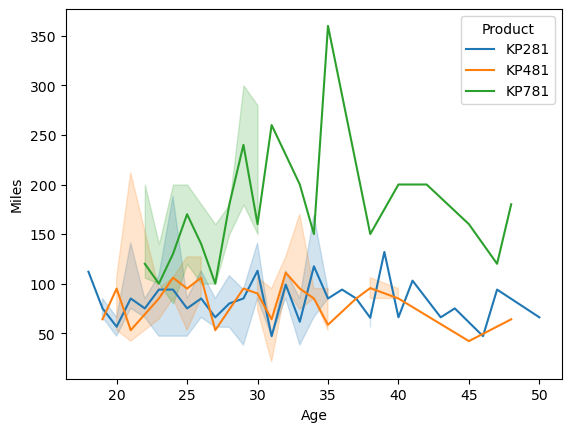

In [89]:
sns.lineplot(data=data , x = data.Age , y = data.Miles , hue = data.Product , estimator = 'median')
plt.show()

We can infer from the above plot that the median miles walked/run over the age 25-45 is more for users with KP781 compared to other products which show a very simialr trend for KP281 and KP481